In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from lime import lime_image
from skimage.segmentation import mark_boundaries

import ipywidgets as widgets

# [LIME documentation](https://lime-ml.readthedocs.io/en/latest/index.html) <--

# Previously trained VGG16

In [68]:
# Random seed for superpixels.
RSEED = 42

# Parameters for experimenting.
model_dir = "../results/classification/20201221_064530_INSTANCE/saved_model/20201221_064530"
layer_name = "block5_conv3"

# img_path = "/Users/cleonwong/Desktop/Code/mammogram-cv/data/preprocessed/Classification/all_classification_CROP/Calc-Test_P_01030_RIGHT_CC_CROP_1___PRE.png"
# img_path = "/Users/cleonwong/Desktop/Code/mammogram-cv/data/preprocessed/Classification/all_classification_CROP/Calc-Test_P_01030_RIGHT_CC_CROP_2___PRE.png"
# img_path = "/Users/cleonwong/Desktop/Code/mammogram-cv/data/preprocessed/Classification/all_classification_CROP/Mass-Training_P_00265_RIGHT_CC_CROP_1___PRE.png"
# img_path = "/Users/cleonwong/Desktop/Code/mammogram-cv/data/preprocessed/Classification/all_classification_CROP/Mass-Training_P_00921_RIGHT_CC_CROP_1___PRE.png"
# img_path = "/Users/cleonwong/Desktop/Code/mammogram-cv/data/preprocessed/Classification/all_classification_CROP/Mass-Training_P_01749_LEFT_MLO_CROP_1___PRE.png"
img_path = "/Users/cleonwong/Desktop/Code/mammogram-cv/data/preprocessed/Classification/all_classification_CROP/Mass-Training_P_00149_LEFT_MLO_CROP_1___PRE.png"
dsize = (224, 224)

# Load sample image for experimenting.
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(src=img, dsize=dsize)

# Min max normalise to [0, 1].
img = (img - img.min()) / (img.max() - img.min())

# Stack grayscale image to make channels=3.
img = np.stack([img, img, img], axis=-1)

# Make img shape into (1, 224, 224, 3).
img = img[np.newaxis, :]

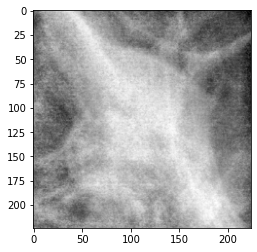

In [69]:
plt.imshow(img[0], cmap="gray")

In [70]:
# Load previously trained model.
model = tf.keras.models.load_model(filepath=model_dir)

# Perform LIME

In [71]:
explainer = lime_image.LimeImageExplainer()

In [72]:
explanation = explainer.explain_instance(img[0], classifier_fn=model.predict, top_labels=1, hide_color=0, num_samples=500, random_seed=RSEED)

  0%|          | 0/500 [00:00<?, ?it/s]

In [75]:
temp, mask = explanation.get_image_and_mask(label=0, positive_only=True, hide_rest=True, num_features=5)

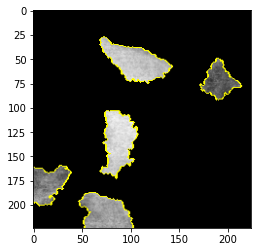

In [76]:
plt.imshow(mark_boundaries(temp, mask))